- 기존엔 Markdown 파일로만 글을 작성했는데, 코드와 함께 블로깅을 하고 싶은 생각에 방법을 찾아봤습니다
- 제 테마에 맞게 하나씩 삽질한 과정을 작성한 글입니다
- 이 글은 jupyter notebook(ipynb)에서 작성되었으며, 환경은 Mac OS입니다
    - 사실 플러그인이 안된다고 해서 다시 블로그에 작성중입니다.. 이건 백업 파일

## 진행 과정
- 1) ```jupyter nbconverter``` 사용하기
- 2) ```_plugins``` 폴더에 플러그인 추가
    - 하지만 Github page는 plugin을 사용하지 못하는 것을 뒤늦게 알았어요..
- 3) ```_ipynbs``` 폴더에 ```*.ipynb``` 작성
- 4) ```_posts``` 폴더에 ```*.ipynbref``` 작성
- 5) ```bundle exec jekyll serve```로 로컬에서 Test

## 1) jupyter nbconverter 사용하기
- ```jupyter nbconverter```는 Jupyter Notebook 파일을 (ipynb) 다른 형태로 변환시켜줍니다
    - PDF, HTML, LaTex, Reveal.js HTML slideshow, Markdown, notebook 등..
- 저흰 여기서 HTML을 사용합니다! Markdown으로 변환해도 되긴 하는데, output의 이미지 주소를 연결하는 작업이 귀찮아서 HTML로 선택했습니다

### 설치
- nbconvert의 모든 기능을 사용하고 싶은 경우엔 Pandoc과 Tex도 설치해야 합니다!
- [nbconvert 공식 문서](http://nbconvert.readthedocs.io/en/latest/install.html)

```
// linux
sudo apt-get install pandoc
sudo apt-get install texlive-xetex

// mac
brew install pandoc
/usr/bin/ruby -e "$(curl -fsSL  https://raw.githubusercontent.com/Homebrew/install/master/install)"<code id="selectable"></code>
brew install caskroom/cask/brew-cask
brew cask install mactex

pip(3) install nbconveter
```

### 사용법
- ```jupyter nbconvert --to html your_ipynb_file.ipynb```
- 다른 Format이나 설정은 [nbconvert 공식 문서](http://nbconvert.readthedocs.io/en/latest/usage.html) 참고

## 2) 플러그인 추가
- ```_plugins```에서 ```ipynb.rb``` 생성
    - 파일명은 상관없고, 확장자만 rb이면 됩니다
    - ```.ipynbref```로 끝나는 파일을 찾아 html으로 convert해줍니다
    - ```--template basic --stdout``` 옵션은 파일로 저장하지 않고 표준 출력으로 나타냅니다
    - ```--TemplateExporter.exclude_input_prompt=True``` 옵션은 jupyter notebook에서 line number를 제외하기 위해 사용했습니다
    - ```--HTMLExporter.anchor_link_text=' '``` 옵션은 마크다운을 HTML로 변환시 H2 ~ H4(굵은 글자)가 링크화되서 그걸 안보이게 하려고 사용했습니다
    - 다른 옵션을 확인하려면 [nbconvert 공식 문서](http://nbconvert.readthedocs.io/en/latest/config_options.html) 참고
- Jekyll은 사이트를 생성하기 직전에 이 디렉토리의 모든 \*.rb 파일을 읽고 작업을 합니다
- Jekyll Serve를 직접 하시는 분이라면 이 방식으로 하면 플러그인이 자동으로 변환을 해줍니다!! 그러나 Github Page를 사용하는 분들은 플러그인을 사용할 수 없습니다^\_ㅠ 대신 직접 ```jupyter convert```를 해줘야 해요...
- 플러그인에 대해 궁금하면 [Jekyll 공식문서(kr)](https://jekyllrb-ko.github.io/docs/plugins/)

```
module Jekyll
  class IPythonNotebook < Converter
    safe true
    priority :low

    def matches(ext)
      ext =~ /^\.ipynbref$/i
    end

    def output_ext(ext)
      ".html"
    end

    def convert(content)
      `jupyter nbconvert --to html --template basic --stdout --TemplateExporter.exclude_input_prompt=True --HTMLExporter.anchor_link_text=' ' \`pwd\`/_ipynbs/#{content}`
    end
  end
end
```

## 3) ipynb 파일 작성
- ```_ipynbs``` 폴더를 만든 후, 쥬피터 노트북 파일을 작성해주세요
- 저는 ```2018-08-15-jupyter-notebook-in-jekyll.ipynb```로 만들었습니다!

## 4) ipynbref 파일 작성
- ```_posts``` 폴더에 ```2018-08-15-jupyter-notebook-in-jekyll.ipynbref```를 생성해주세요!
- 본문 헤드는 ```_posts``` 에서 사용하는 것과 동일하게 작성하고, 본문엔 변환할 ipynb 제목을 작성해주세요

```
---
layout: post
title:  "jupyter notebook(ipynb)로 jekyll 글쓰기"
subtitle: "jupyter notebook(ipynb)로 jekyll 글쓰기"
categories: development
tags: web
comments: true
---
2018-08-15-jupyter-notebook-in-jekyll.ipynb
```


## 5) Local에서 Test하기
- Github에 Push해서 Test할 순 있지만, 개발자라면 로컬에서 테스트하고 프러덕션(push)에 배포해봅시다
- github blog 폴더에 들어가서 아래 명령어 실행

```
bundle exec jekyll serve
```

- 에러가 발생하면 여러가지 이유가 있을 수 있는데, 확인할 부분
    - 루비가 설치되어 있는가? : 당연히 설치한 후, 노트북을 올리는 작업한다고 생각해서 생략했어요..
    - bundler 설치되어 있는가? bundler는 루비의 일관된 환경을 제공해주는 친구 
        - ```gem install bundler```한 후, ```bundle install```

---

## Test (##)
### Test (###)
#### Test (####)
- 여기부턴 어떻게 ipynb 파일이 변하는지 테스트하기 위해 작성했습니다
    - 목차1
    - 목차2
        - 세부 목차1

## Markdown Table
| Process | Max needs | Current needs |
|:-------:|:---------:|:-------------:|
|    P0   |    10     |       5       |
|    P1   |     4     |       2       |
|    P2   |     9     |       2       |

## Image
- img src="" 사용
<img src="https://www.google.co.kr/logos/doodles/2018/national-liberation-day-of-korea-2018-5697243024719872-law.gif?raw=1">

## Code 부분
- 디테일한 format은 추후 수정 예정!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
# 걍 주석

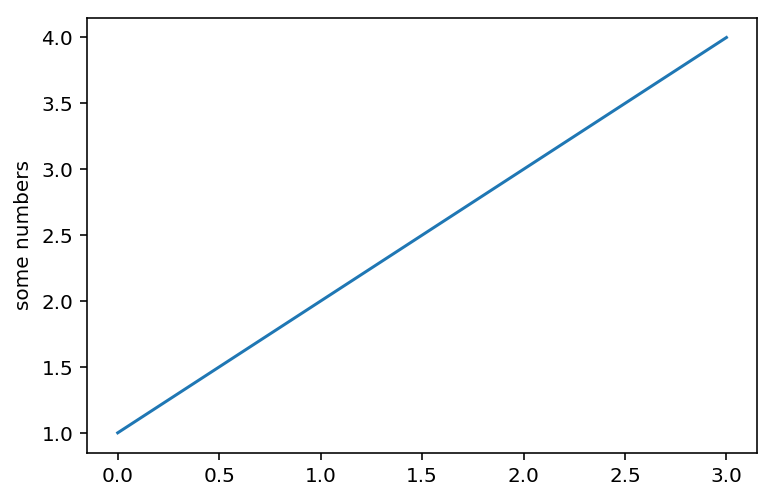

In [13]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [14]:
print("convert html test")

convert html test


In [22]:
def test_function(n):
    print("len : {}, ".format(len(n)), "word is " + n)

In [23]:
test_function("oh")

len : 2,  word is oh
